In [66]:
from weibo_api.client import WeiboClient
import networkx as nx
import matplotlib.pyplot as plt
import json
import requests
import re
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
client = WeiboClient()


In [67]:
uid = '5623741644'

In [68]:
p = client.people(uid)

In [70]:
p.followers_count

'41.4万'

In [74]:
for status in p.statuses.page(1):
    print(status.text)

📒 如果你想彻底学会护肤【本条长图】带你: 从了解自己的皮肤开始，找方法、选产品，学会科学搭配和调整产品用法<br /><br />-<br /><br />📒 【𝐌𝐢𝐚的巨型护肤目录】<a  href="https://m.weibo.cn/5623741644/4814769427319062" data-hide=""><span class='url-icon'><img style='width: 1rem;height: 1rem' src='https://h5.sinaimg.cn/upload/2015/09/25/3/timeline_card_small_web_default.png'></span><span class="surl-text">网页链接</span></a>（自助功课机）肌肤问题、肤质类型、季节护理、护肤流程、成分专题……<br /><br />🧾 选品必看（偷懒版）<a  href="https://m.weibo.cn/search?containerid=231522type%3D1%26t%3D10%26q%3D%23mia%E6%8A%A4%E8%82%A4%E6%8E%A8%E8%8D%90%E6%B8%85%E5%8D%95%23&extparam=%23mia%E6%8A%A4%E8%82%A4%E6%8E%A8%E8%8D%90%E6%B8%85%E5%8D%95%23" data-hide=""><span class="surl-text">#mia护肤推荐清单#</span></a> <br /><br />? ...<a href="/status/4814769586179666">全文</a>
三月互动榜❤️姗姗来迟～<br />（下周一周内大家看到抓紧私信我哈）<br />从这个月开始每个月给大家的🎁换一下方式，热心互动的家人们的中奖概率会平均一些，用心互动的特别是优质评论，我会给大家安排你需要的产品🌹<br /><br />谢谢大家的支持（下周长篇干货马上来袭⏰） 
关于脸色问题再补充一点：如果你早上起来洗完脸，一直到工作之前脸色都挺好，低头工作超过2小时，脸色特别差而且颈背部酸胀，可以试试工作的时候搞一个颈枕，拖住脖子减少低头，脸色也会好一点（不是带货，不卖颈枕，按摩仪别来滴滴
这次的生

In [71]:
def getUserInfo(uid):
    p = client.people(uid)
    UserInfo = {}
    UserInfo['id'] = p.id
    UserInfo['name'] = p.name
    UserInfo['gender'] = p.gender
    UserInfo['follower_count'] = p.followers_count

    return UserInfo
getUserInfo(uid)

{'id': 5623741644, 'name': 'miamaja', 'gender': 'f', 'follower_count': '41.4万'}

In [77]:
def model_LLM(text):
    #TODO add the model here
    #psudo function which returns the predicted rumor prob for the texts
    return 0.5
def get_initial_val(uid,num):
    score = 0
    ##Average the LLM score from num of texts
    p = client.people(uid)
    cnt = 0
    for status in p.statuses.page(1):
        score += model_LLM(status.text)
        cnt+=1
    return score/cnt
get_initial_val(uid,2)

0.5

In [115]:
def get_follow_uid(uid):
    ##give the uid of a person
    ##return the uids that the person follows
    p = client.people(uid)
    follow_uid = []
    for follow in p.follows.page(1):
        follow_uid.append(follow.id)
    return follow_uid

In [116]:
def get_follow_uid_deep(list,uid,floor,num):
    """
    floor: depth
    num: width
    
    """
    if floor==0:
        if uid in list.keys():
            return list
        else:
            list[str(uid)] = dict()
            #list[uid]['userInfo'] = getUserInfo(uid)
            #print('{}\t{}\t{}\t{}'.format(uid, list[uid]['userInfo']['name'], list[uid]['userInfo']['gender'],
                                          #list[uid]['userInfo']['desc']))
            list[uid]['follow_ls'] = get_follow_uid(uid)
            print(list)
            return list
        
    elif uid in list.keys() and 'follow_ls' in list[uid].keys():
        return list
    else:
        list[str(uid)] = dict()
        #list[uid]['userInfo'] = getUserInfo(uid)
        list[uid]['follow_ls'] = get_follow_uid(uid)
        i = 0
        for id in list[uid]['follow_ls']:
            list = get_follow_uid_deep(list, str(id), floor - 1, num)
                # with open('./list.json', 'w', encoding='utf-8') as f:
                #     f.write(json.dumps(list, ensure_ascii=False))
        return list
        

In [47]:
data = dict()

data = get_follow_uid_deep(data,uid,1,20)

{'5623741644': {'follow_ls': [2792675770, 5515994599, 5131120377, 7403665868, 7792942214, 5032741422, 7856413769, 3788222372, 7583809100, 2598520421, 7474103880, 3239835472, 5831203045, 7828072556, 1801585640, 1799244901, 7782525256, 3089825091, 7504418980, 5236329541]}, '2792675770': {'follow_ls': [1255795640, 7781917041, 7888981638, 2598520421, 3701477805, 7575030448, 6532102014, 1918021250, 2318910945, 2937067297, 1988645095, 5628110601, 1502844527, 5449334139, 5879230372, 7026429244, 6648441346, 6868583654, 3686739204, 5678938731]}}
{'5623741644': {'follow_ls': [2792675770, 5515994599, 5131120377, 7403665868, 7792942214, 5032741422, 7856413769, 3788222372, 7583809100, 2598520421, 7474103880, 3239835472, 5831203045, 7828072556, 1801585640, 1799244901, 7782525256, 3089825091, 7504418980, 5236329541]}, '2792675770': {'follow_ls': [1255795640, 7781917041, 7888981638, 2598520421, 3701477805, 7575030448, 6532102014, 1918021250, 2318910945, 2937067297, 1988645095, 5628110601, 1502844527, 

In [9]:
#import matplotlib as mpl
#mpl.get_cachedir()

'/home/develop/.cache/matplotlib'

In [117]:
getUserInfo(uid)

{'id': 5623741644,
 'name': 'miamaja',
 'gender': '女',
 'followers_count': '41.4万',
 'follow_count': 507}

In [118]:
def str2value(valueStr):
    valueStr = str(valueStr)
    idxOfYi = valueStr.find('亿')
    idxOfWan = valueStr.find('万')
    if idxOfYi != -1 and idxOfWan != -1:
        return int(float(valueStr[:idxOfYi])*1e8 + float(valueStr[idxOfYi+1:idxOfWan])*1e4)
    elif idxOfYi != -1 and idxOfWan == -1:
        return int(float(valueStr[:idxOfYi])*1e8)
    elif idxOfYi == -1 and idxOfWan != -1:
        return int(float(valueStr[idxOfYi+1:idxOfWan])*1e4)
    elif idxOfYi == -1 and idxOfWan == -1:
        return float(valueStr)


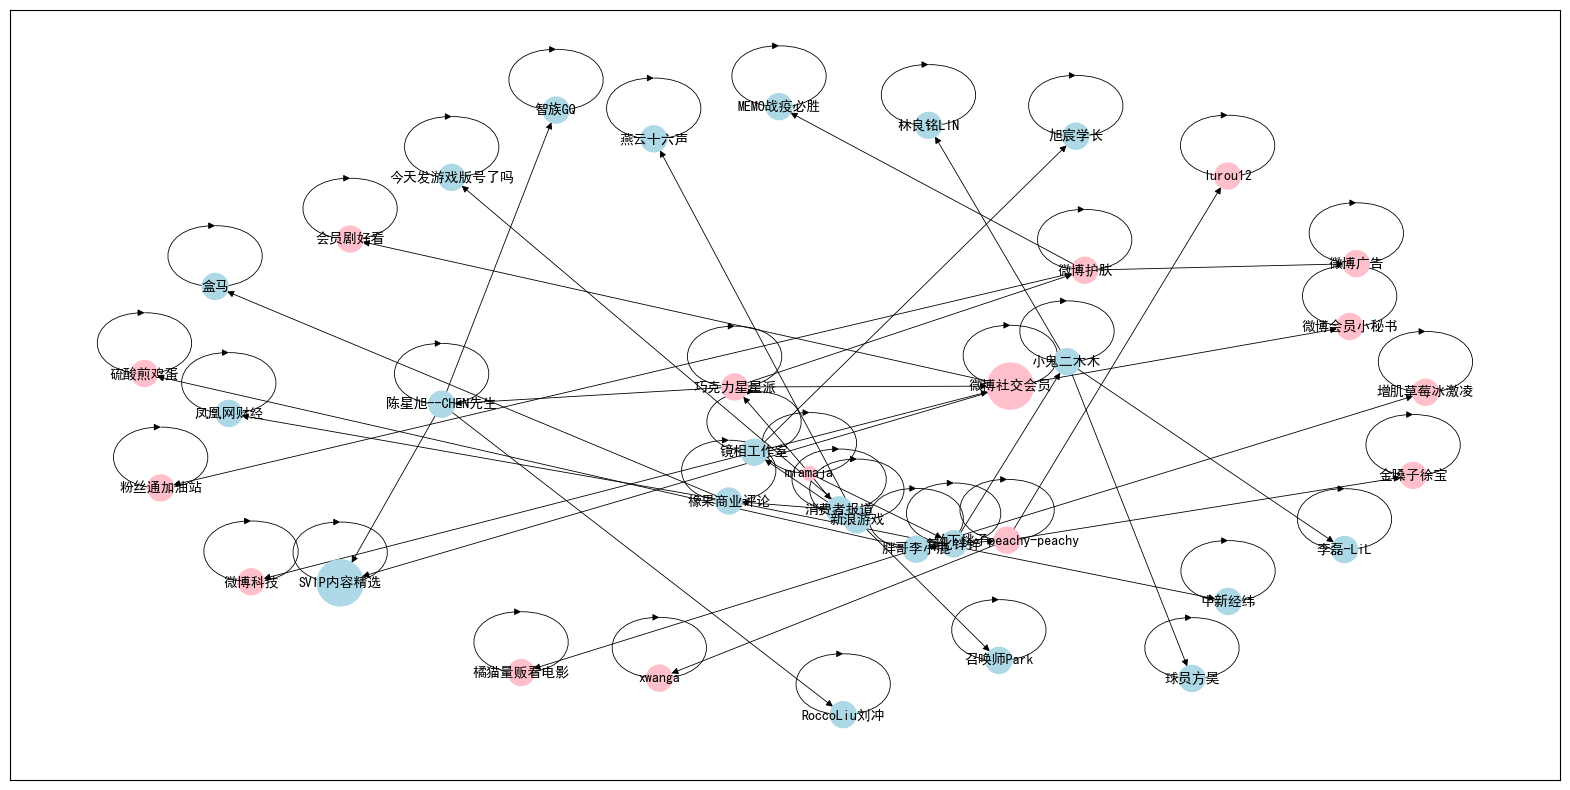

In [87]:
import requests
import re
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams['font.sans-serif'] = ['YouYuan']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
uid = '5623741644'
# 请求文本
def getHtmlText(url, code='UTF-8'):
    trytime = 10
    while trytime > 0:
        try:
            header = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.26 Safari/537.36 Core/1.63.6726.400 QQBrowser/10.2.2265.400',
            }
            r = requests.get(url, headers=header, timeout=5)
            r.raise_for_status()
            r.encoding = code
            return r.text
        except:
            print("get获取失败,重连中")
            trytime -= 1


# 获取用户信息
def getUserInfo(uid):
    url = 'https://m.weibo.cn/api/container/getIndex?type=uid&value={}'.format(uid)
    Infomation = json.loads(getHtmlText(url))
    UserInfo = {}
    UserInfo['id'] = Infomation['data']['userInfo']['id']
    UserInfo['name'] = Infomation['data']['userInfo']['screen_name']
    UserInfo['gender'] = '女' if Infomation['data']['userInfo']['gender'] == 'f' else '男'
    UserInfo['followers_count'] = Infomation['data']['userInfo']['followers_count']
    UserInfo['follow_count'] = Infomation['data']['userInfo']['follow_count']
    #UserInfo['desc'] = Infomation['data']['userInfo']['description']
    # with open('./UserInfo.json', 'w', encoding='utf-8') as f:
    #     f.write(json.dumps(UserInfo, ensure_ascii=False))
    return UserInfo

# 获取用户关注列表
def getInterestList(uid, num):
    url = 'https://m.weibo.cn/api/container/getIndex?containerid=231051_-_followers_-_{}&page=1'.format(uid)
    data = json.loads(getHtmlText(url))
    intertestList = []
    cardlist = data['data']['cards']
    for cards in cardlist:
        if 'title' in cards and (cards['title'] == '她的全部关注' or cards['title'] =='他的全部关注'):
            i = 0
            for card in cards['card_group']:
                if i < num:
                    person = {}
                    person['id'] = card['user']['id']
                    intertestList.append(person)
                    i += 1
    # with open('./interestList.json', 'w', encoding='utf-8') as f:
    #     f.write(json.dumps(intertestList, ensure_ascii=False))
    return intertestList


# 深搜获取多层用户信息及用户关注列表
def deepSearchList(list, uid, floor, num):
    if floor == 0:
        # print(list.keys())
        if uid in list.keys():
            print('{}有重复'.format(uid))
            return list
        else:
            # print(list.keys())
            # print(uid in list.keys())
            list[str(uid)] = dict()
            list[uid]['userInfo'] = getUserInfo(uid)
            print('{}\t{}\t{}\t{}'.format(uid, list[uid]['userInfo']['name'], list[uid]['userInfo']['gender'],
                                          list[uid]['userInfo']['followers_count']))
            return list
    elif uid in list.keys() and 'interestList' in list[uid].keys():
        # print('interestList' in list[uid].keys())
        #print('{}有重复'.format(uid))
        return list
    else:
        list[str(uid)] = dict()
        list[uid]['userInfo'] = getUserInfo(uid)
        list[uid]['interestList'] = getInterestList(uid, num)
        print('{}\t{}\t{}\t{}'.format(uid, list[uid]['userInfo']['name'],
                                      list[uid]['userInfo']['gender'],
                                      list[uid]['userInfo']['followers_count']))
        i = 0
        for interestList in list[uid]['interestList']:
            if i < num:
                list = deepSearchList(list, str(interestList['id']), floor - 1, num)
                # with open('./list.json', 'w', encoding='utf-8') as f:
                #     f.write(json.dumps(list, ensure_ascii=False))
                i += 1
        return list


if __name__ == '__main__':
    uid=uid   #微博的uid

    try:
        with open(f'./{uid}.json', 'r', encoding='utf-8') as f:
            data = json.load(f)
    except:
        data = dict()
    data = deepSearchList(data, uid, 3, 3)
    with open(f'./{uid}.json', 'w', encoding='utf-8') as f:
        f.write(json.dumps(data, ensure_ascii=False))
#     print(data)
#     print(len(data))

    plt.figure(figsize=(20,10),dpi=100)
    G = nx.DiGraph()
    node_size_list = dict()
    node_color_list = dict()

    initial_vals = dict()
    for person in data:
        G.add_node(data[person]['userInfo']['name'])
        node_size_list[data[person]['userInfo']['name']] = 0
        node_color_list[data[person]['userInfo']['name']] = 'lightblue' if data[person]['userInfo']['gender'] == '男' else 'pink'
        
        initial_vals[data[person]['userInfo']['name']] = get_initial_val(data[person]['userInfo']['id'],2)

    for person in data:
        if 'interestList' in data[person].keys():
            for interest in data[person]['interestList']:
                #print('{} -> {}'.format(person, interest['id']))
                if str2value(data[str(interest['id'])]['userInfo']['followers_count'])==0:
                    a= 1
                    print('notice')
                    
                G.add_edge(data[person]['userInfo']['name'],
                           data[str(interest['id'])]['userInfo']['name'],weight = str2value(data[str(interest['id'])]['userInfo']['followers_count']))
                node_size_list[data[str(interest['id'])]['userInfo']['name']] += 1
        G.add_edge(data[person]['userInfo']['name'],
            data[person]['userInfo']['name'],weight = str2value(data[str(interest['id'])]['userInfo']['followers_count']))    
            
    nx.draw_networkx(G,
            pos=nx.spring_layout(G),
            with_labels=True,
            node_size=[i * i * 250 + 100 for i in list(node_size_list.values())],
            node_color=[i for i in list(node_color_list.values())],
            width=0.6,
            font_size=10)
    plt.savefig(f"./{uid}微博关系图.png",dpi=100)
    plt.show()


In [126]:
pagerank = nx.pagerank(G)
pagerank_vector = np.array([pagerank[node] for node in G.nodes()])
initial_vals_vector = np.array([initial_vals[node] for node in G.nodes()])
user_rumor_index = np.dot(pagerank_vector,initial_vals_vector)-pagerank_vector[0]*initial_vals_vector[0]
user_rumor_index

0.49778177042434285